<a href="https://colab.research.google.com/github/Rosie-Ping/Aggie-Hackathon/blob/main/Covid_Mobility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
mobility = pd.read_csv("https://storage.googleapis.com/aggie-hacks-us-covid19/Mobility_US")
case = pd.read_csv("https://storage.googleapis.com/aggie-hacks-us-covid19/Cases_US")

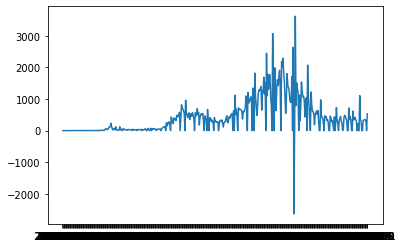

In [ ]:
x = case[case['state']=='ID'].date
y = case[case['state']=='ID'].new_confirmed_cases	
plt.plot(x,y)
plt.show()

In [ ]:
new_conf_qt = case[['state','new_confirmed_cases']].groupby('state').quantile(0.98)

f =[]
for i in case['state']:
  f.append(new_conf_qt.loc[i][0])

case['new_confirmed_cases_quantile'] = f
print(case)

       state_fips_code state  ... new_deaths  new_confirmed_cases_quantile
0                   16    ID  ...        NaN                       1916.72
1                   16    ID  ...        0.0                       1916.72
2                   16    ID  ...        0.0                       1916.72
3                   16    ID  ...        0.0                       1916.72
4                   16    ID  ...        0.0                       1916.72
...                ...   ...  ...        ...                           ...
22741               24    MD  ...       19.0                       3151.64
22742               24    MD  ...       21.0                       3151.64
22743               24    MD  ...       21.0                       3151.64
22744               24    MD  ...       18.0                       3151.64
22745               24    MD  ...        6.0                       3151.64

[22746 rows x 8 columns]


In [ ]:
#remove 2% outliers and negative values
case['new_confirmed_cases_remove_otl']=np.where((case['new_confirmed_cases']< case['new_confirmed_cases_quantile']) & (case['new_confirmed_cases']>=0),case['new_confirmed_cases'],np.nan)
print(case['new_confirmed_cases'].isna().sum())
print(case['new_confirmed_cases_remove_otl'].isna().sum())

51
553


In [ ]:
#rolling average for 7 days
#Group by states
ga = case.groupby('state')['new_confirmed_cases_remove_otl'].rolling(7,min_periods=1).mean()

In [ ]:
#convert multi-index to standard index for future merge
ga.droplevel(0)

3122           NaN
3123      0.000000
3124      0.000000
3125      0.000000
3126      0.000000
           ...    
13821    55.142857
13822    58.285714
13823    60.142857
13824    60.142857
13825    60.142857
Name: new_confirmed_cases_remove_otl, Length: 22746, dtype: float64

In [ ]:
case['new_confirmed_cases_moving_avg'] = ga.droplevel(0)

In [ ]:
#emw

In [ ]:
ga.isna().sum()

51

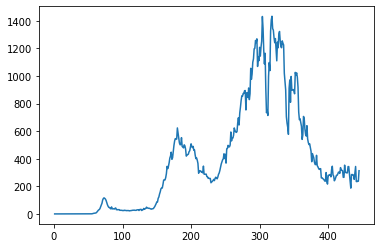

In [ ]:
x = range(0,len(ga['ID']))
y = ga['ID']	
plt.plot(x,y)
plt.show()

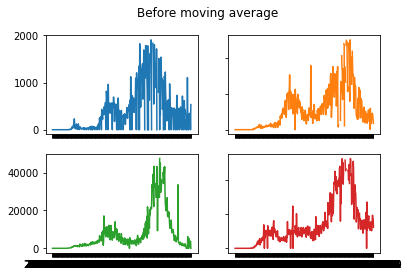

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Before moving average')
ax1.plot(case[case['state']=='ID'].date, case[case['state']=='ID'].new_confirmed_cases_remove_otl)
ax2.plot(case[case['state']=='TX'].date, case[case['state']=='TX'].new_confirmed_cases_remove_otl, 'tab:orange')
ax3.plot(case[case['state']=='CA'].date, case[case['state']=='CA'].new_confirmed_cases_remove_otl, 'tab:green')
ax4.plot(case[case['state']=='VA'].date, case[case['state']=='VA'].new_confirmed_cases_remove_otl, 'tab:red')

for ax in fig.get_axes():
    ax.label_outer()

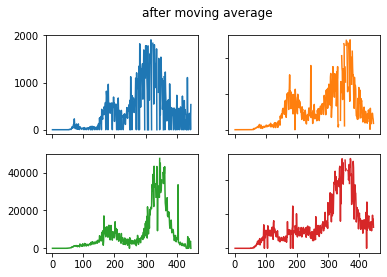

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('after moving average')
ax1.plot(range(0,len(case[case['state']=='ID'])), case[case['state']=='ID'].new_confirmed_cases_remove_otl)
ax2.plot(range(0,len(case[case['state']=='TX'])), case[case['state']=='TX'].new_confirmed_cases_remove_otl, 'tab:orange')
ax3.plot(range(0,len(case[case['state']=='CA'])), case[case['state']=='CA'].new_confirmed_cases_remove_otl, 'tab:green')
ax4.plot(range(0,len(case[case['state']=='VA'])), case[case['state']=='VA'].new_confirmed_cases_remove_otl, 'tab:red')

for ax in fig.get_axes():
    ax.label_outer()

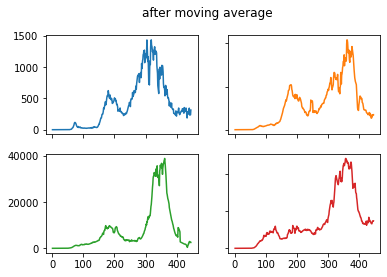

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('after moving average')
ax1.plot(range(0,len(case[case['state']=='ID'])), case[case['state']=='ID'].new_confirmed_cases_moving_avg)
ax2.plot(range(0,len(case[case['state']=='TX'])), case[case['state']=='TX'].new_confirmed_cases_moving_avg, 'tab:orange')
ax3.plot(range(0,len(case[case['state']=='CA'])), case[case['state']=='CA'].new_confirmed_cases_moving_avg, 'tab:green')
ax4.plot(range(0,len(case[case['state']=='VA'])), case[case['state']=='VA'].new_confirmed_cases_moving_avg, 'tab:red')

for ax in fig.get_axes():
    ax.label_outer()

In [ ]:
case.to_csv(r'case.csv', index=False, header=True)

In [ ]:
case

,state_fips_code,state,date,confirmed_cases,deaths,new_confirmed_cases,new_deaths,new_confirmed_cases_quantile,new_confirmed_cases_remove_otl,new_confirmed_cases_moving_avg
0,16,ID,2020-01-22,0,0,NaN,NaN,1916.72,NaN,NaN
1,16,ID,2020-01-23,0,0,0.0,0.0,1916.72,0.0,0.000000
2,16,ID,2020-01-24,0,0,0.0,0.0,1916.72,0.0,0.000000
3,16,ID,2020-01-25,0,0,0.0,0.0,1916.72,0.0,0.000000
4,16,ID,2020-01-26,0,0,0.0,0.0,1916.72,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
22741,24,MD,2021-04-07,420526,8322,1471.0,19.0,3151.64,1471.0,1311.714286
22742,24,MD,2021-04-08,421823,8343,1297.0,21.0,3151.64,1297.0,1270.714286
22743,24,MD,2021-04-09,423663,8364,1840.0,21.0,3151.64,1840.0,1325.428571
22744,24,MD,2021-04-10,425247,8382,1584.0,18.0,3151.64,1584.0,1369.571429


In [ ]:
case.pivot_table(index='state',columns='date',values='new_confirmed_cases_moving_avg')

date,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,...,2021-03-03,2021-03-04,2021-03-05,2021-03-06,2021-03-07,2021-03-08,2021-03-09,2021-03-10,2021-03-11,2021-03-12,2021-03-13,2021-03-14,2021-03-15,2021-03-16,2021-03-17,2021-03-18,2021-03-19,2021-03-20,2021-03-21,2021-03-22,2021-03-23,2021-03-24,2021-03-25,2021-03-26,2021-03-27,2021-03-28,2021-03-29,2021-03-30,2021-03-31,2021-04-01,2021-04-02,2021-04-03,2021-04-04,2021-04-05,2021-04-06,2021-04-07,2021-04-08,2021-04-09,2021-04-10,2021-04-11
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AK,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,124.714286,124.428571,129.428571,129.428571,129.428571,127.142857,122.571429,118.285714,131.142857,126.714286,126.714286,126.714286,132.000000,133.857143,137.142857,126.285714,121.857143,121.857143,121.857143,118.428571,128.714286,133.000000,132.142857,147.428571,147.428571,147.428571,98.857143,162.571429,134.571429,168.857143,170.857143,170.857143,170.857143,239.857143,151.571429,176.833333,135.600000,189.600000,189.600000,189.600000
AL,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,1003.285714,995.571429,1004.285714,964.142857,939.142857,904.000000,883.000000,606.000000,597.142857,546.857143,552.285714,549.857143,1161.714286,1158.571429,1155.714286,1113.571429,1123.142857,1112.428571,1111.857143,507.428571,449.714286,460.714286,443.000000,431.000000,428.571429,421.714286,408.571429,447.714286,386.428571,390.285714,386.285714,366.285714,348.285714,331.571429,313.000000,313.428571,311.571429,275.000000,275.142857,292.285714
AR,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,775.571429,728.571429,734.571429,707.142857,352.000000,342.428571,347.285714,343.428571,333.571429,320.000000,318.571429,314.714286,311.714286,304.428571,297.000000,290.428571,256.142857,247.857143,244.000000,234.571429,212.285714,238.428571,243.857143,237.571429,222.142857,215.714286,221.714286,234.142857,195.571429,178.428571,172.714286,180.142857,182.714286,176.142857,152.285714,156.428571,154.857143,160.000000,152.285714,140.000000
AZ,0.0,0.0,0.000000,0.25,0.2,0.166667,0.142857,0.142857,0.142857,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,1712.142857,1877.285714,2202.428571,943.857143,1313.428571,1439.142857,1304.571429,1249.714286,1373.000000,1243.571429,1359.857143,854.571429,825.714286,895.857143,907.857143,666.714286,494.142857,377.857143,571.714286,474.857143,477.571429,422.857143,375.571429,452.857143,620.428571,426.571429,529.714286,539.428571,552.571429,608.142857,636.